<a href="https://colab.research.google.com/github/bababasbebebe/Kaggle-Predicting-Loan-Payback/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE

import joblib

!pip install catboost
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import ParameterGrid
from sklearn.base import clone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_df = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/train.csv', index_col='id')
test_df = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/test.csv', index_col='id')

In [ ]:
train_df.head(10)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [ ]:
stats = train_df.describe()
stats

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


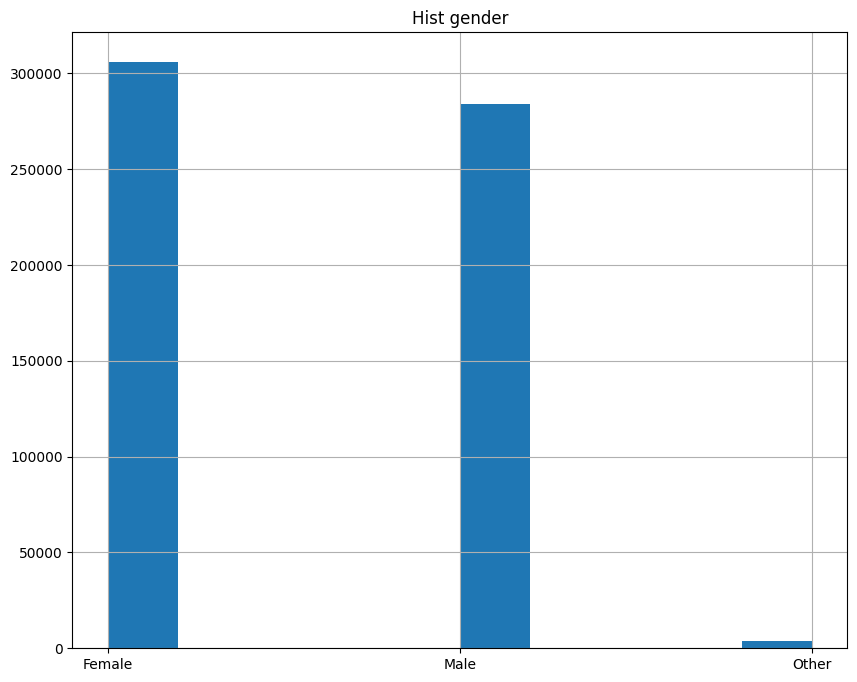

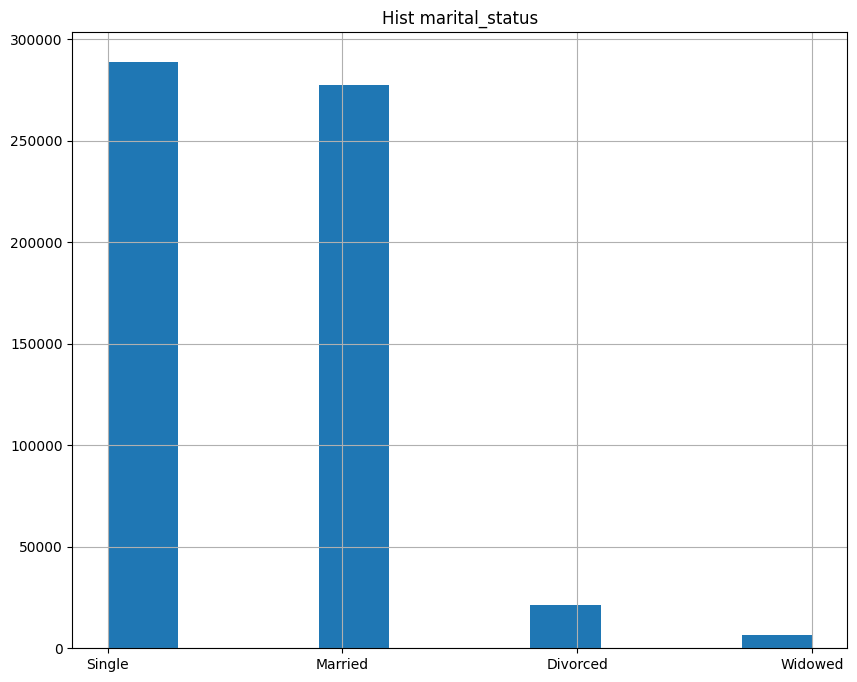

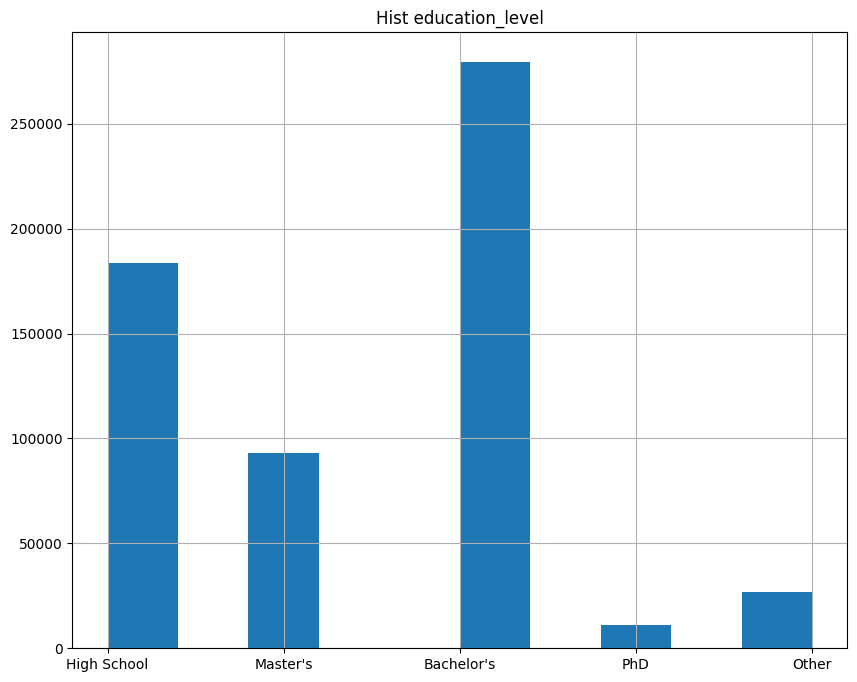

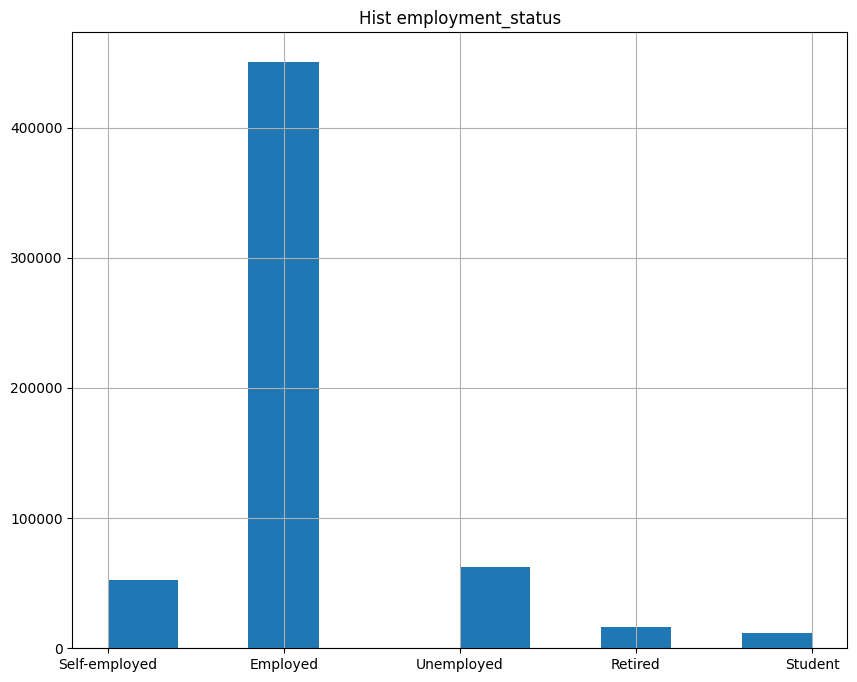

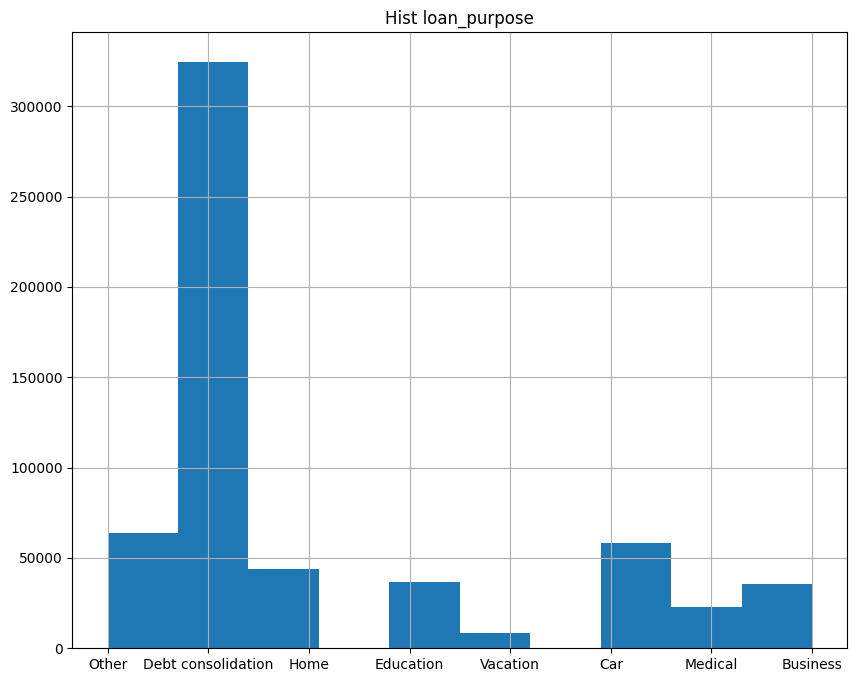

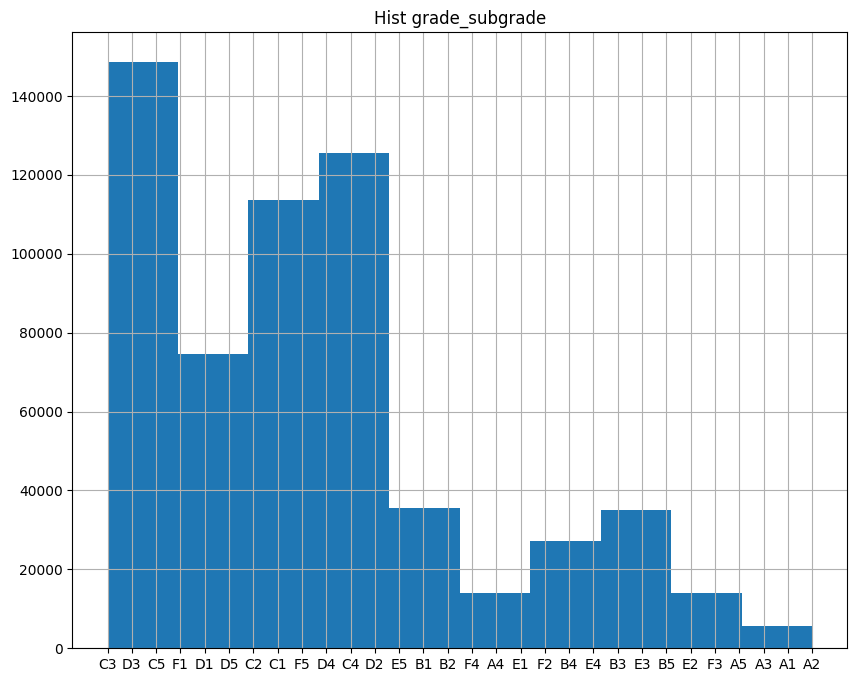

In [ ]:
obj_cols = train_df.select_dtypes(['object']).columns

def obj_plotting(feature, data=train_df):
  plt.figure(figsize=(10, 8))

  data[feature].hist()
  plt.title(f'Hist {feature}')


for col in obj_cols:
  obj_plotting(col)

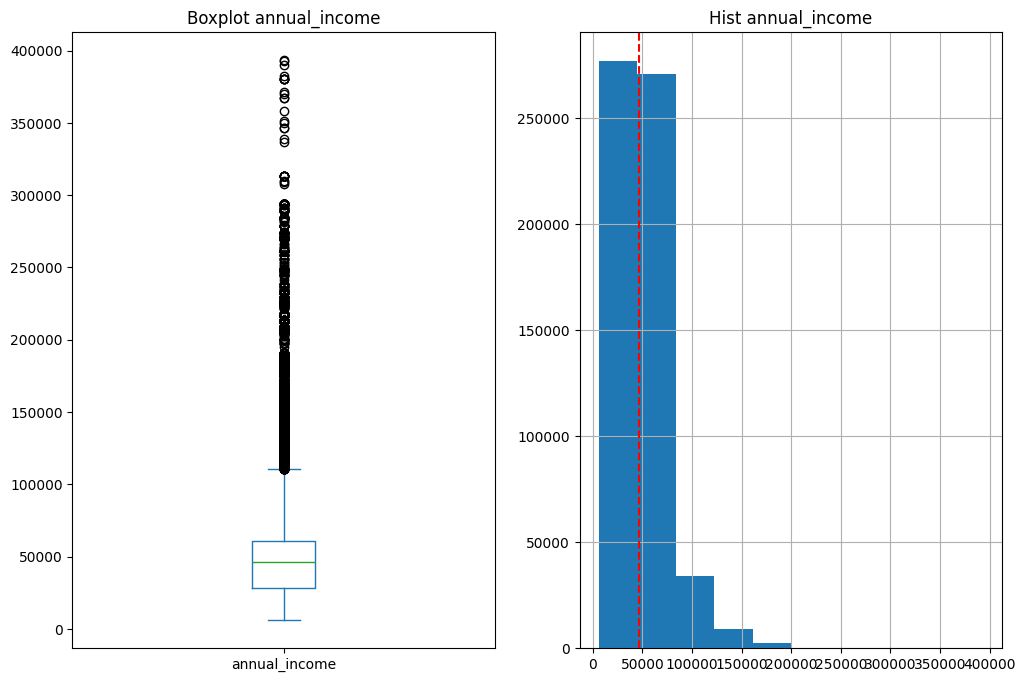

Медиана: 46557.68
Минимум: 6002.43
Максимум: 393381.74
Количество выбросов: 15917
Процент выбросов: 2.68%
Верхние выбросы: 110579.22
------------------------------




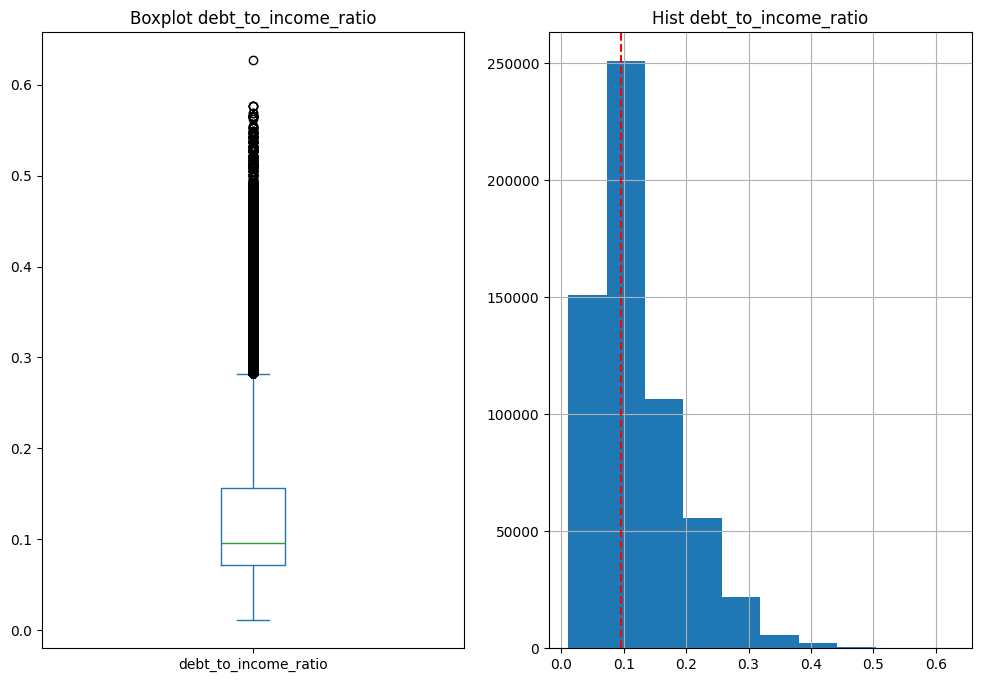

Медиана: 0.10
Минимум: 0.01
Максимум: 0.63
Количество выбросов: 17556
Процент выбросов: 2.96%
Верхние выбросы: 0.28
------------------------------




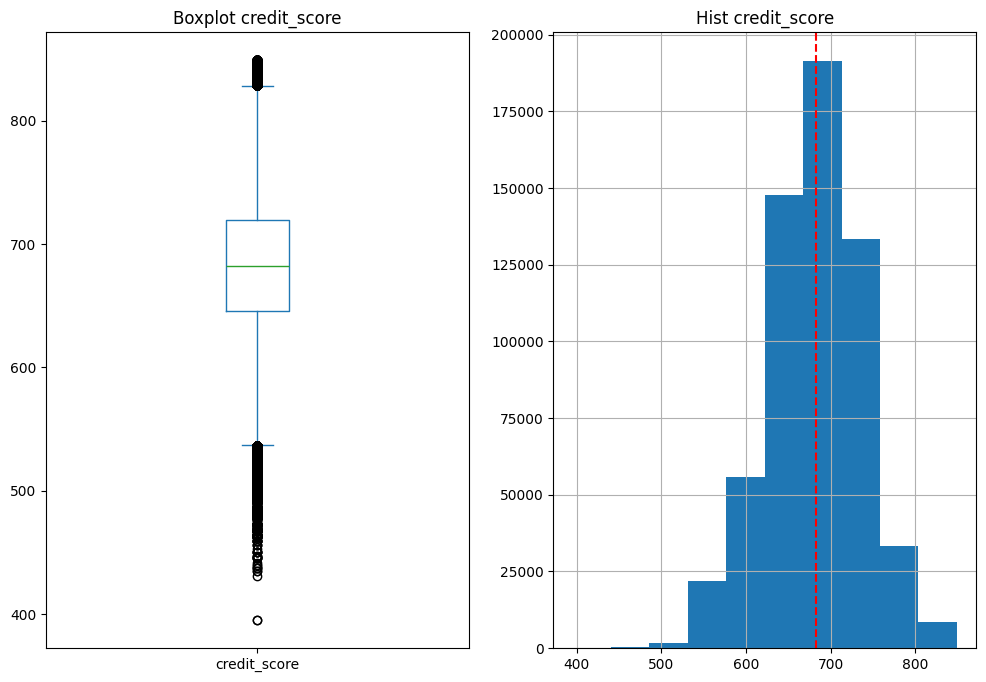

Медиана: 682.00
Минимум: 395.00
Максимум: 849.00
Количество выбросов: 5901
Процент выбросов: 0.99%
Нижние выбросы: 536.00
Верхние выбросы: 829.00
------------------------------




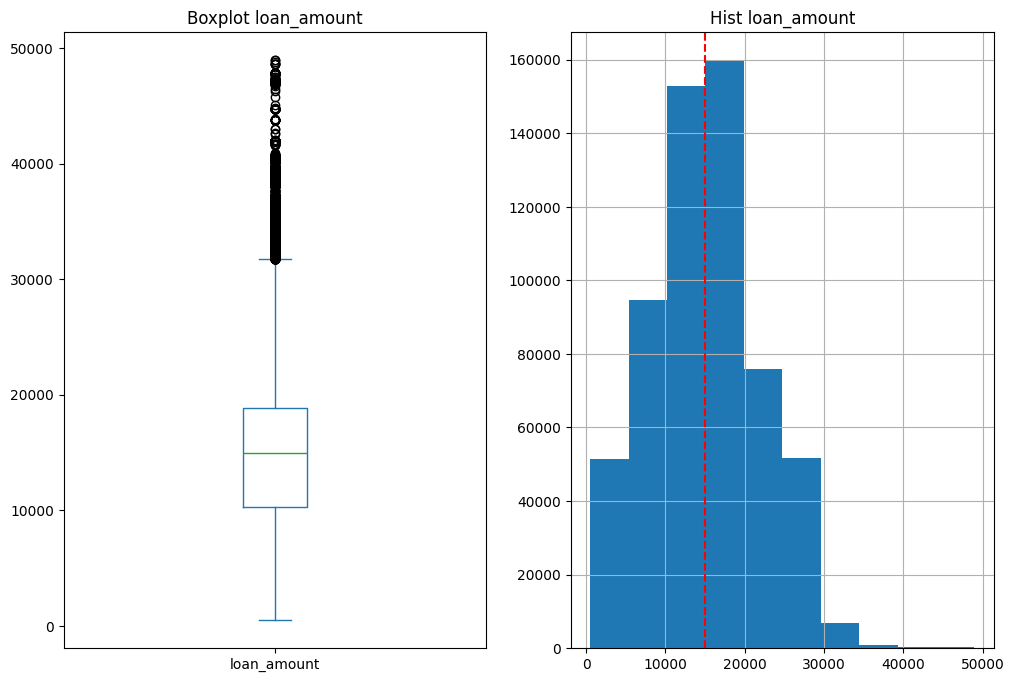

Медиана: 15000.22
Минимум: 500.09
Максимум: 48959.95
Количество выбросов: 2902
Процент выбросов: 0.49%
Верхние выбросы: 31741.58
------------------------------




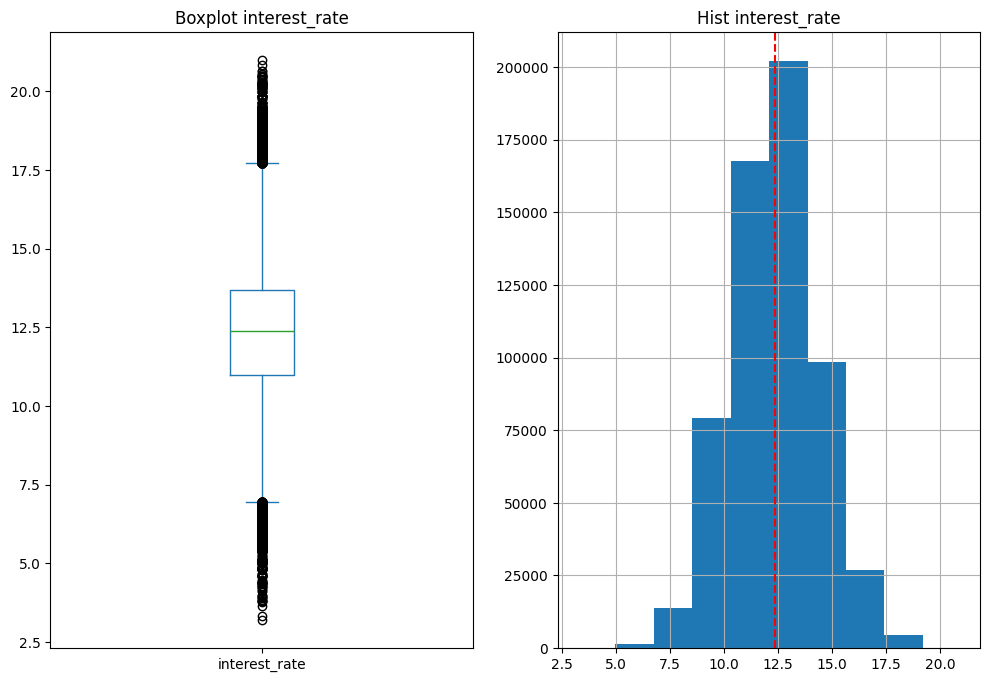

Медиана: 12.37
Минимум: 3.20
Максимум: 20.99
Количество выбросов: 5136
Процент выбросов: 0.86%
Нижние выбросы: 6.95
Верхние выбросы: 17.72
------------------------------




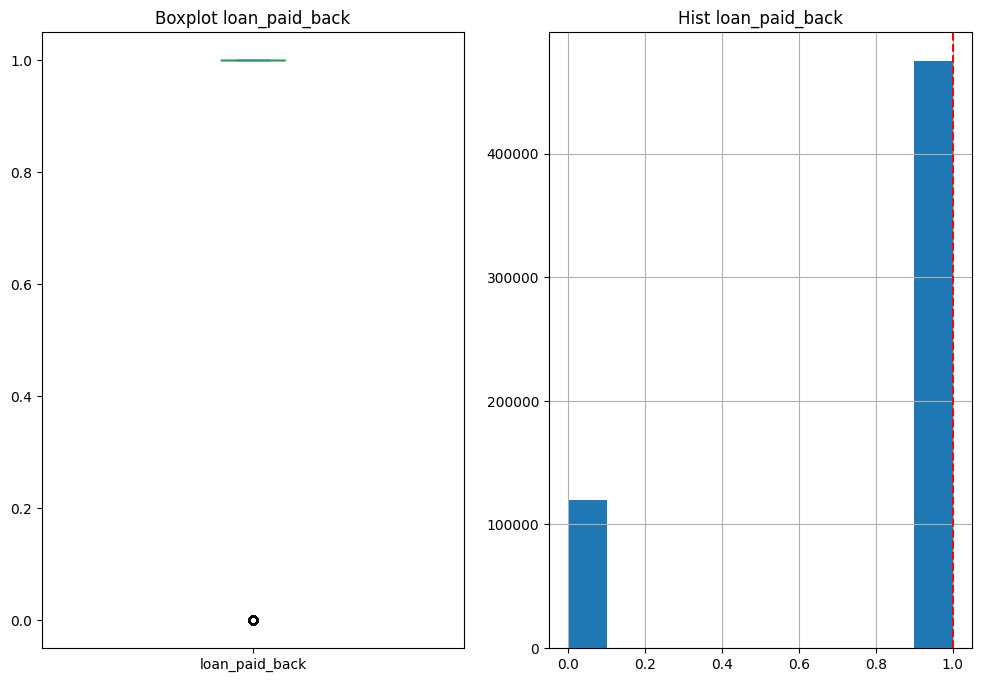

Медиана: 1.00
Минимум: 0.00
Максимум: 1.00
Количество выбросов: 119500
Процент выбросов: 20.12%
Нижние выбросы: 0.00
------------------------------




In [ ]:
num_cols = train_df.select_dtypes(['float64','int64']).columns

def nums_plotting(feature, data=train_df):
  plt.figure(figsize=(12, 8))

  plt.subplot(1, 2, 1)
  data[feature].plot.box()
  plt.title(f'Boxplot {feature}')

  plt.subplot(1, 2, 2)
  data[feature].hist()
  plt.axvline(data[feature].median(), color='red', linestyle='--', label='Медиана')
  plt.title(f'Hist {feature}')

  stats = data[feature].describe()

  Q1 = stats['25%']
  Q3 = stats['75%']
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[feature][(data[feature] < lower_bound) | (data[feature] > upper_bound)]

  plt.show()

  print(f"Медиана: {stats['50%']:.2f}")
  print(f"Минимум: {stats['min']:.2f}")
  print(f"Максимум: {stats['max']:.2f}")
  print(f"Количество выбросов: {len(outliers)}")
  print(f"Процент выбросов: {(len(outliers)/len(data[feature]))*100:.2f}%")
  if len(outliers) > 0:
    lower_outliers = data[feature][data[feature] < lower_bound]
    upper_outliers = data[feature][data[feature] > upper_bound]

    if len(lower_outliers) > 0:
        print(f"Нижние выбросы: {lower_outliers.max():.2f}")
    if len(upper_outliers) > 0:
        print(f"Верхние выбросы: {upper_outliers.min():.2f}")
  print("-" * 30)
  print('\n')

for col in num_cols:
  nums_plotting(col)

<Axes: >

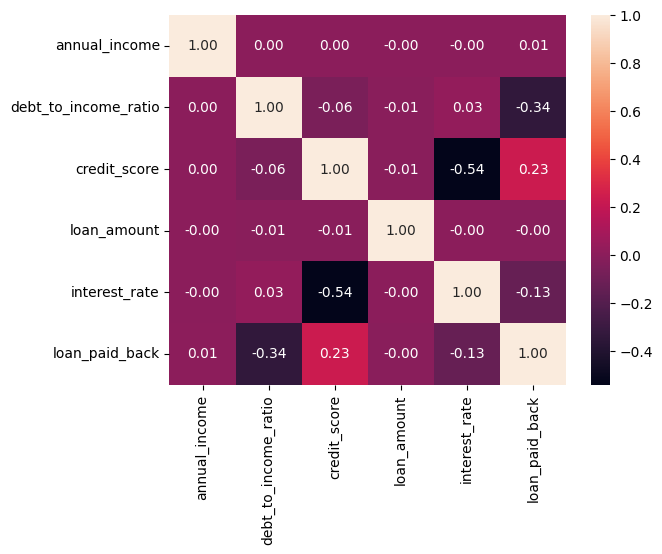

In [ ]:
# Матрица корреляций
corr = train_df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
# Предобработка

def preprocessing(
    df,
    target_col: str,
    log_cols=None,
    label_cols=None,
    onehot_cols=None,
    smote: bool = False,
    test_size: float = 0.2,
    random_state: int = 42,
):
  label_encoders = {}
  onehot_encoder = None
  scaler = None

  df = df.copy()

  # ----------------- 0. Split raw data -----------------
  y = df[target_col].values
  X = df.drop(columns=[target_col])

  X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    stratify=y,
    random_state=random_state
  )

  print(f'Split done\n')

  # ----------------- 1. Log-transform -----------------
  if log_cols != None:
    for col in log_cols:
      min_val = X_train[col].min()
      shift = 1 - min_val if min_val <= 0 else 1
      X_train[col] = np.log(X_train[col] + shift)
      X_val[col] = np.log(X_val[col] + shift)

    print(f'Log-transform done\n')

  # ----------------- 2. Label Encoding -----------------
  if label_cols:
    for col in label_cols:
      le = LabelEncoder()
      X_train[col] = le.fit_transform(X_train[col].astype(str))
      X_val[col] = le.transform(X_val[col].astype(str))
      label_encoders[col] = le

    print(f'Label Encoding done\n')

  # ----------------- 3. One-Hot Encoding -----------------
  if onehot_cols:
    onehot_encoder = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False)

    train_ohe = onehot_encoder.fit_transform(X_train[onehot_cols])
    val_ohe   = onehot_encoder.transform(X_val[onehot_cols])

    ohe_feature_names = onehot_encoder.get_feature_names_out(onehot_cols)

    train_ohe_df = pd.DataFrame(
        train_ohe,
        columns=ohe_feature_names,
        index=X_train.index
    )

    val_ohe_df = pd.DataFrame(
        val_ohe,
        columns=ohe_feature_names,
        index=X_val.index
    )

    X_train = X_train.drop(columns=onehot_cols)
    X_val   = X_val.drop(columns=onehot_cols)

    X_train = pd.concat([X_train, train_ohe_df], axis=1)
    X_val   = pd.concat([X_val, val_ohe_df], axis=1)

    print(f'One-Hot Encoding done\n')

  # ----------------- 4. SMOTE (train only) -----------------
  if smote:
    sm = SMOTE(random_state=random_state)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    print(f'SMOTE done\n')

  # ----------------- 5. StandardScaler -----------------
  num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
  scaler = StandardScaler()
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
  X_val[num_cols]   = scaler.transform(X_val[num_cols])

  print(f'StandardScaler done\n')

  # ----------------- 6. Return -----------------
  transformers = {
      "scaler": scaler,
      "label_encoders": label_encoders,
      "onehot_encoder": onehot_encoder,
      "log_cols": log_cols,
      "label_cols": label_cols,
      "onehot_cols": onehot_cols,
  }

  print(f'Return done\n')
  print(f'Preprocessing ends\n\n\n')

  return X_train, y_train, X_val, y_val, transformers

In [ ]:
target_col = 'loan_paid_back'

obj_cols = list(obj_cols)
num_cols = list(train_df.select_dtypes(['float64','int64']).columns)
num_cols.pop(-1)
ohe_cols = [col for col in obj_cols if train_df[col].nunique() <= 4]
le_cols  = [col for col in obj_cols if train_df[col].nunique() > 4]

print(num_cols, '\n', ohe_cols, '\n', le_cols)

['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate'] 
 ['gender', 'marital_status'] 
 ['education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


In [ ]:
# RF
X_train_smote_log_ohe, y_train_smote_log_ohe, X_val_smote_log_ohe, y_val_smote_log_ohe, transformers_smote_log_ohe = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=le_cols, onehot_cols=ohe_cols, smote=True)
X_train_smote_ohe, y_train_smote_ohe, X_val_smote_ohe, y_val_smote_ohe, transformers_smote_ohe = preprocessing(train_df, target_col, label_cols=le_cols, onehot_cols=ohe_cols, smote=True)

# RFBalanced
X_train_log_ohe, y_train_log_ohe, X_val_log_ohe, y_val_log_ohe, transformers_log_ohe = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=le_cols, onehot_cols=ohe_cols)
X_train_ohe, y_train_ohe, X_val_ohe, y_val_ohe, transformers_ohe = preprocessing(train_df, target_col, label_cols=le_cols, onehot_cols=ohe_cols)

# CatBoost
X_train_smote_log, y_train_smote_log, X_val_smote_log, y_val_smote_log, transformers_smote_log = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=obj_cols, smote=True)
X_train_smote, y_train_smote, X_val_smote, y_val_smote, transformers_smote = preprocessing(train_df, target_col, label_cols=obj_cols, smote=True)

# CatBoostBalanced
X_train_log, y_train_log, X_val_log, y_val_log, transformers_log = preprocessing(train_df, target_col, log_cols=num_cols, label_cols=obj_cols)
X_train, y_train, X_val, y_val, transformers = preprocessing(train_df, target_col, label_cols=obj_cols)

Split done

Log-transform done

Label Encoding done

One-Hot Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

One-Hot Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Log-transform done

Label Encoding done

One-Hot Encoding done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

One-Hot Encoding done

StandardScaler done

Return done

Preprocessing ends



Split done

Log-transform done

Label Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

SMOTE done

StandardScaler done

Return done

Preprocessing ends



Split done

Log-transform done

Label Encoding done

StandardScaler done

Return done

Preprocessing ends



Split done

Label Encoding done

StandardScaler done

Return done

Preprocessing ends





In [ ]:
# RF with One-Hot Encoding
# smote_log_RF
joblib.dump(
    {
        "X_train": X_train_smote_log_ohe,
        "y_train": y_train_smote_log_ohe,
        "X_val": X_val_smote_log_ohe,
        "y_val": y_val_smote_log_ohe,
        "transformers": transformers_smote_log_ohe,
    },
    "RF_smote_log.joblib"
)

# smote_RF
joblib.dump(
    {
        "X_train": X_train_smote_ohe,
        "y_train": y_train_smote_ohe,
        "X_val": X_val_smote_ohe,
        "y_val": y_val_smote_ohe,
        "transformers": transformers_smote_ohe,
    },
    "RF_smote.joblib"
)

# log_RF
joblib.dump(
    {
        "X_train": X_train_log_ohe,
        "y_train": y_train_log_ohe,
        "X_val": X_val_log_ohe,
        "y_val": y_val_log_ohe,
        "transformers": transformers_log_ohe,
    },
    "RF_log.joblib"
)

# RF
joblib.dump(
    {
        "X_train": X_train_ohe,
        "y_train": y_train_ohe,
        "X_val": X_val_ohe,
        "y_val": y_val_ohe,
        "transformers": transformers_ohe,
    },
    "RF.joblib"
)

#________________________________________________________

# CatBoost only with Label Encoding
# smote_log_CatBoost
joblib.dump(
    {
        "X_train": X_train_smote_log,
        "y_train": y_train_smote_log,
        "X_val": X_val_smote_log,
        "y_val": y_val_smote_log,
        "transformers": transformers_smote_log,
    },
    "CB_smote_log.joblib"
)

# smote_CatBoost
joblib.dump(
    {
        "X_train": X_train_smote,
        "y_train": y_train_smote,
        "X_val": X_val_smote,
        "y_val": y_val_smote,
        "transformers": transformers_smote,
    },
    "CB_smote.joblib"
)

# log_CatBoost
joblib.dump(
    {
        "X_train": X_train_log,
        "y_train": y_train_log,
        "X_val": X_val_log,
        "y_val": y_val_log,
        "transformers": transformers_log,
    },
    "CB_log.joblib"
)

# CatBoost
joblib.dump(
    {
        "X_train": X_train,
        "y_train": y_train,
        "X_val": X_val,
        "y_val": y_val,
        "transformers": transformers,
    },
    "CB.joblib"
)

['CB.joblib']

In [5]:
# ------------------------ Получение данных ------------------------ #
def get_file(
    file_path: str
):
  """
  file_path:     - путь к данным

  Возвращает:
  - X_train      : тренировочные признаки
  - y_train      : тренировочная целевая переменная
  - X_val        : валидационные признаки
  - y_val        : валидационная целевая переменная
  """
  print("\033[31m{}".format("get_file started.."))

  try:
    data = joblib.load(file_path)
  except:
    raise ValueError("Неверный file_path")

  X_train = data["X_train"]
  y_train = data["y_train"]
  X_val   = data["X_val"]
  y_val   = data["y_val"]

  print("\033[31m{}".format("get_file done"))
  return X_train, y_train, X_val, y_val


# ------------------------ Выбор модели и пространства гиперпараметров ------------------------ #
def get_model_and_param_distributions(
    model_type: str,
    random_state: int = 42,
    pos_weight = 0.25
):
  """
  model_type:    - 'rf', 'rf_balanced', 'cb', 'cb_balanced'
  pos_weight:    - N_neg/N_pos = 1/4 = 0.25 : для cb_balanced

  Возвращает:
  - model        : необученная модель
  - param_dist   : словарь гиперпараметров
  - vis_params   : список имён гиперпараметров для визуализации
  """
  print("\033[31m{}".format("get_model_and_param_distributions started.."))

  if model_type == "rf":
    model = RandomForestClassifier(
        n_estimators=200,
        n_jobs=-1,
        random_state=random_state
    )
    param_dist = {
        "n_estimators":       [100, 200],
        "max_depth":          [None, 5, 10, 15],
        "min_samples_split":  [2, 5, 10],
        "min_samples_leaf":   [1, 2, 4],
        "max_features":       ["sqrt", "log2"],
    }
    vis_params = ["n_estimators", "max_depth", "min_samples_leaf", "max_features"]

  elif model_type == "rf_balanced":
    model = RandomForestClassifier(
        n_jobs=-1,
        random_state=random_state,
        class_weight="balanced"
    )
    param_dist = {
        "n_estimators":       [100, 200],
        "max_depth":          [None, 5, 10, 15],
        "min_samples_split":  [2, 5, 10],
        "min_samples_leaf":   [1, 2, 4],
        "max_features":       ["sqrt", "log2"],
    }
    vis_params = ["n_estimators", "max_depth", "min_samples_leaf", "max_features"]

  elif model_type == "cb":
    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=random_state,
        thread_count=-1
    )
    param_dist = {
        "depth":          [4, 5, 6, 7, 8],
        "learning_rate":  np.linspace(0.01, 0.2, 10),
        "l2_leaf_reg":    [1, 3, 5, 7, 9],
        "iterations":     [200, 400, 600],
    }
    vis_params = ["depth", "learning_rate", "iterations", "l2_leaf_reg"]

  elif model_type == "cb_balanced":
    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=random_state,
        thread_count=-1,
        scale_pos_weight=pos_weight
    )
    param_dist = {
        "depth":          [4, 5, 6, 7, 8],
        "learning_rate":  np.linspace(0.01, 0.2, 10),
        "l2_leaf_reg":    [1, 3, 5, 7, 9],
        "iterations":     [200, 400, 600],
    }
    vis_params = ["depth", "learning_rate", "iterations", "l2_leaf_reg"]

  else:
    raise ValueError("Неверный model_type")

  print("\033[31m{}".format("get_model_and_param_distributions done"))
  return model, param_dist, vis_params


# ------------------------ Визуализация результатов RandomizedSearchCV ------------------------ #
def plot_random_search_results(model_type: str, rs: RandomizedSearchCV, vis_params):
  """
  Делает простые графики зависимостей mean_test_score от каждого гиперпараметра из vis_params.
  """
  print("\033[31m{}".format("plot_random_search_results started.."))

  cv_results = pd.DataFrame(rs.cv_results_)
  scores = cv_results["mean_test_score"]
  print(vis_params)
  for p in vis_params:
    col_name = "param_" + p
    if col_name not in cv_results.columns:
      continue

    values = cv_results[col_name]

    plt.figure(figsize=(6, 4))

    if not pd.api.types.is_numeric_dtype(values):
      grouped = [scores[values == v] for v in values.unique()]
      labels = [str(v) for v in values.unique()]
      plt.boxplot(grouped, tick_labels=labels)
      plt.ylabel("mean_test_score (ROC-AUC)")
      plt.title(f"RandomSearch: {p} (categorical) vs ROC-AUC on " + model_type)

    else:
      plt.scatter(values, scores)
      plt.xlabel(p)
      plt.ylabel("mean_test_score (ROC-AUC)")
      plt.title(f"RandomSearch: {p} vs ROC-AUC on " + model_type)

    plt.grid(True)
    plt.tight_layout()
    plt.show()
  print("\033[31m{}".format("plot_random_search_results done"))

# ------------------------ Обучение с RandomSearch + CV ------------------------ #
def train_with_random_search(
    X,
    y,
    model_type: str,
    n_iter: int = 10,
    cv_splits: int = 3,
    random_state: int = 42,
    pos_weight: float = 0.25,
    scoring: str = "roc_auc"
):
  """
  X, y        — данные (после предобработки)
  model_type  — 'rf', 'rf_balanced', 'cb', 'cb_balanced' (тип модели)
  n_iter      — RandomizedSearch итераций
  cv_splits   — количество фолдов в KFold
  pos_weight  — N_neg / N_pos для CatBoostBalanced
  scoring     — метрика для поиска (по умолчанию 'roc_auc')

  Возвращает:
  - best_estimator
  - random_search объект
  - cv_results_df
  - vis_params (список гиперпараметров для визуализации)
  """
  print("\033[31m{}".format("train_with_random_search started.."))

  # 1. Берём модель и пространство гиперпараметров
  model, param_dist, vis_params = get_model_and_param_distributions(
      model_type=model_type,
      random_state=random_state,
      pos_weight=pos_weight
  )

  # 2. KFold
  cv = KFold(
      n_splits=cv_splits,
      shuffle=True,
      random_state=random_state
  )
  print("\033[31m{}".format("KFold done"))

  # 3. RandomizedSearchCV c оптимизацией ROC-AUC
  rs = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_dist,
      n_iter=n_iter,
      scoring=scoring,  # здесь по умолчанию 'roc_auc'
      cv=cv,
      n_jobs=-1,
      random_state=random_state,
      verbose=1
  )

  rs.fit(X, y)
  print("\033[31m{}".format("RandomizedSearchCV done"))

  print("\033[37m{}".format("Лучшие параметры " + model_type + " (RandomSearch):"), rs.best_params_)
  print("\033[37m{}".format("Лучший ROC-AUC " + model_type + " (RandomSearch):"), rs.best_score_)

  print("\033[31m{}".format("plot_random_search_results done"))
  return rs, vis_params


# ------------------------ Валидация ------------------------ #
def evaluate_model(model, X_val, y_val):
  """
  Возвращает ROC-AUC на валидационной выборке.
  """
  print("\033[31m{}".format("evaluate_model started.."))
  y_proba = model.predict_proba(X_val)[:, 1]

  roc = roc_auc_score(y_val, y_proba)
  print("\033[31m{}".format("evaluate_model done"))
  return roc


# ------------------------ Кастомный GridSearch на валидационной выборке ------------------------ #
def grid_search_manual(model, param_grid, X_train, y_train, X_val, y_val):
  """
  Ручной GridSearch:
  - model        : базовая модель (RandomForest, CatBoost и т.п.)
  - param_grid   : dict с пространством гиперпараметров
  - X_train, y_train : обучение
  - X_val, y_val     : валидация для оценки через evaluate_model()

  Возвращает:
  - best_model   : модель с лучшим ROC-AUC на валидации
  - best_params  : её гиперпараметры
  - best_roc     : лучший ROC-AUC
  """
  print("\033[31m{}".format("grid_search_manual started.."))

  best_model = None
  best_params = None
  best_roc = -1.0

  for params in ParameterGrid(param_grid):
    # Клонируем базовую модель, чтобы не портить оригинал
    m = clone(model)
    m.set_params(**params)
    print("\033[31m{}".format("model cloned"))

    # Обучаем на train
    print("\033[31m{}".format("model fitted.."))
    m.fit(X_train, y_train)
    print("\033[31m{}".format("model done"))

    # Оцениваем на val
    roc = evaluate_model(m, X_val, y_val)

    # Обновляем лучшую модель
    if roc > best_roc:
      best_roc = roc
      best_params = params

    print("\033[31m{}".format("iter done"), best_roc)

  print("\033[31m{}".format("grid_search_manual done"))
  return best_params, best_roc

get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV done
Лучшие параметры cb (RandomSearch): {'learning_rate': np.float64(0.11555555555555555), 'l2_leaf_reg': 7, 'iterations': 600, 'depth': 6}
Лучший ROC-AUC cb (RandomSearch): 0.9624392455275483
plot_random_search_results done
plot_random_search_results started..
['depth', 'learning_rate', 'iterations', 'l2_leaf_reg']


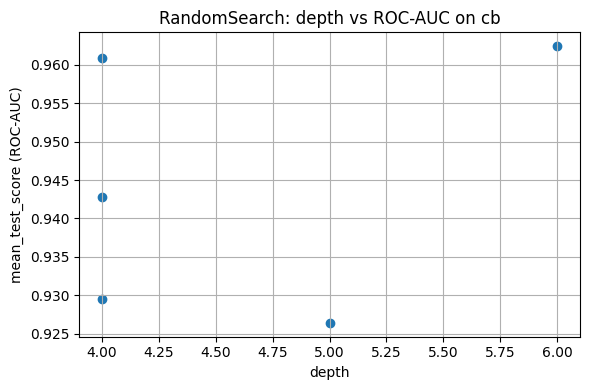

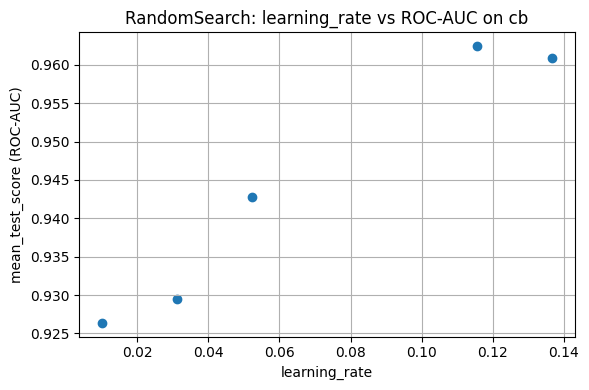

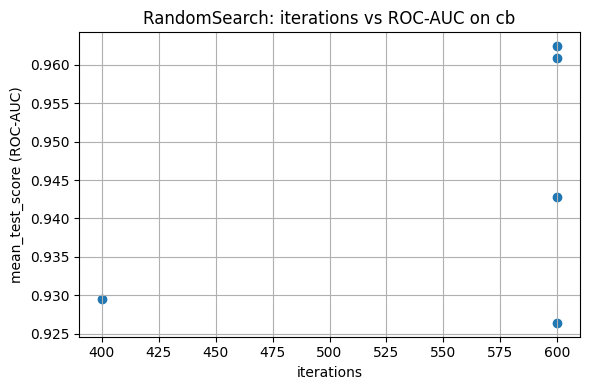

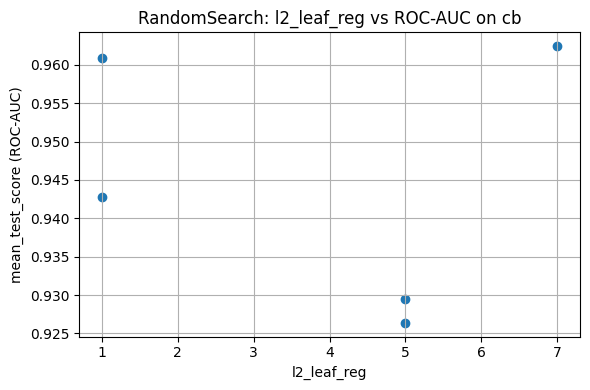

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV done
Лучшие параметры cb (RandomSearch): {'learning_rate': np.float64(0.11555555555555555), 'l2_leaf_reg': 7, 'iterations': 600, 'depth': 6}
Лучший ROC-AUC cb (RandomSearch): 0.955499848340183
plot_random_search_results done
plot_random_search_results started..
['depth', 'learning_rate', 'iterations', 'l2_leaf_reg']


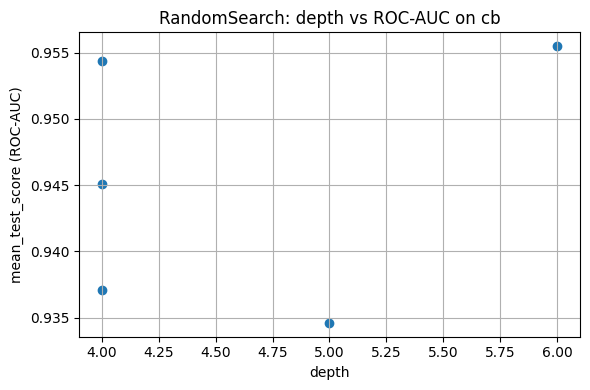

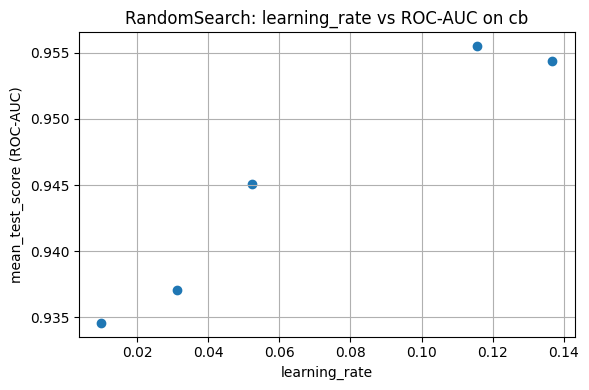

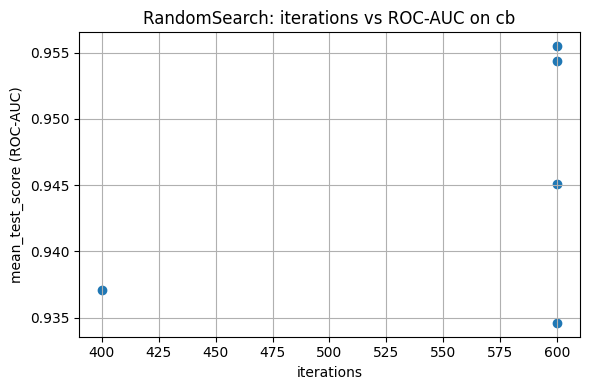

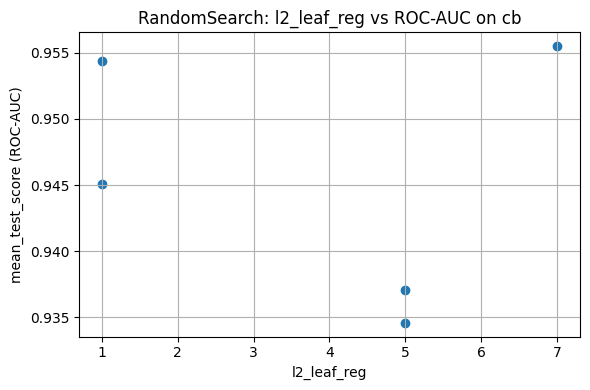

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV done
Лучшие параметры cb_balanced (RandomSearch): {'learning_rate': np.float64(0.11555555555555555), 'l2_leaf_reg': 7, 'iterations': 600, 'depth': 6}
Лучший ROC-AUC cb_balanced (RandomSearch): 0.9219252424312452
plot_random_search_results done
plot_random_search_results started..
['depth', 'learning_rate', 'iterations', 'l2_leaf_reg']


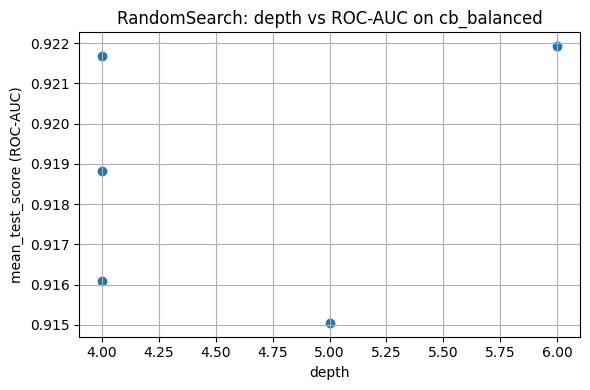

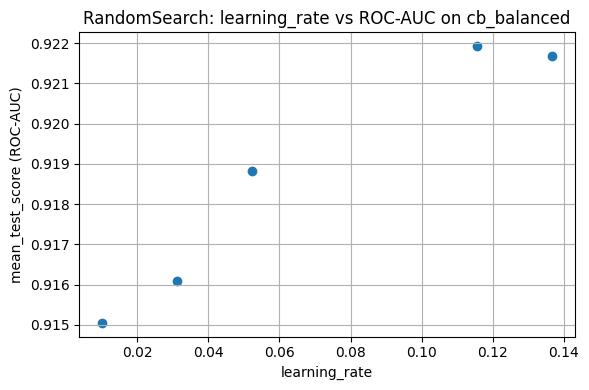

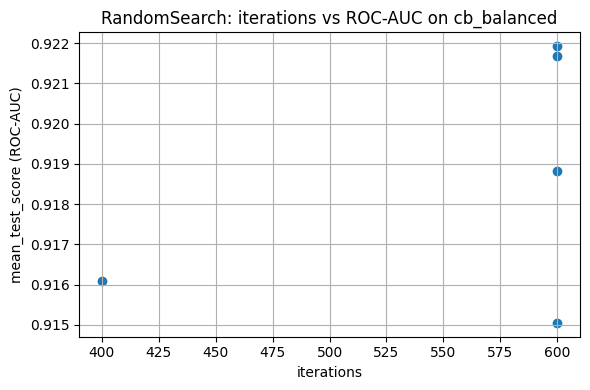

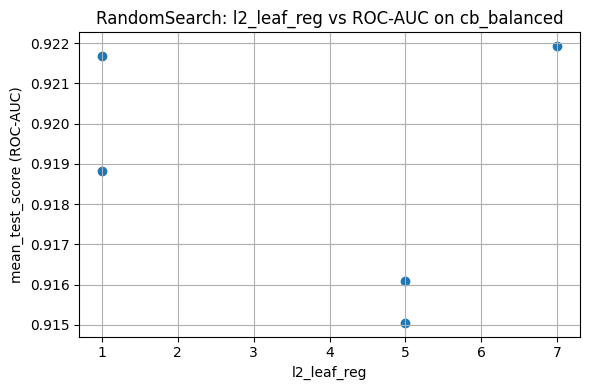

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV done
Лучшие параметры cb_balanced (RandomSearch): {'learning_rate': np.float64(0.1366666666666667), 'l2_leaf_reg': 1, 'iterations': 600, 'depth': 4}
Лучший ROC-AUC cb_balanced (RandomSearch): 0.9217474821033615
plot_random_search_results done
plot_random_search_results started..
['depth', 'learning_rate', 'iterations', 'l2_leaf_reg']


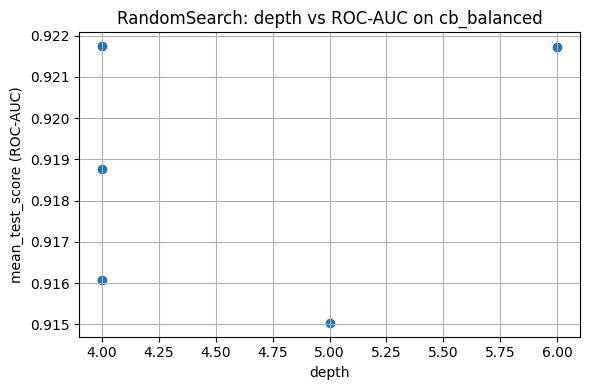

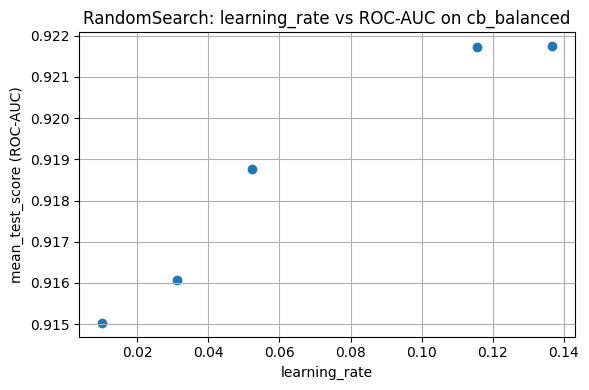

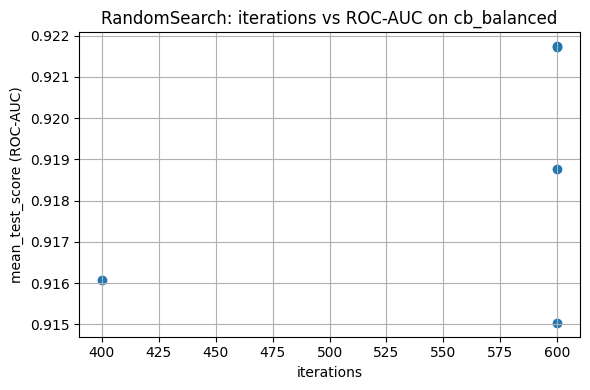

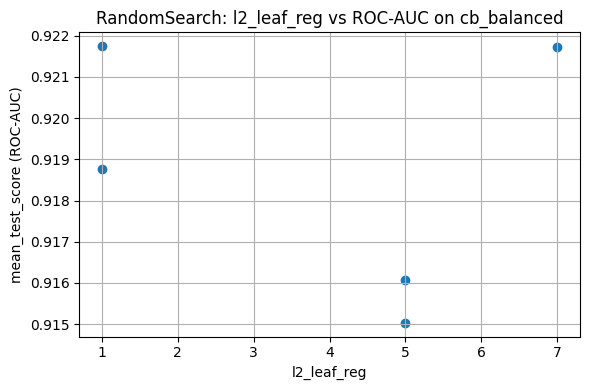

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV done
Лучшие параметры rf (RandomSearch): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Лучший ROC-AUC rf (RandomSearch): 0.9573757889789675
plot_random_search_results done
plot_random_search_results started..
['n_estimators', 'max_depth', 'min_samples_leaf', 'max_features']


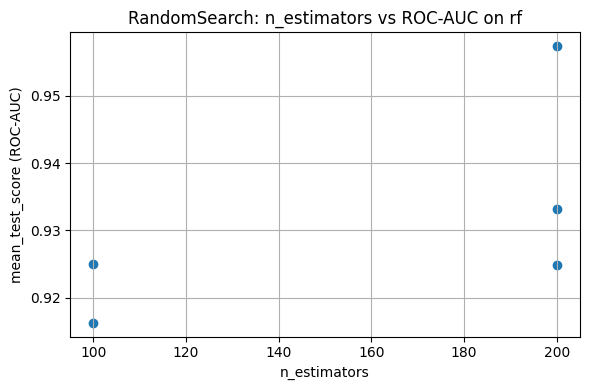

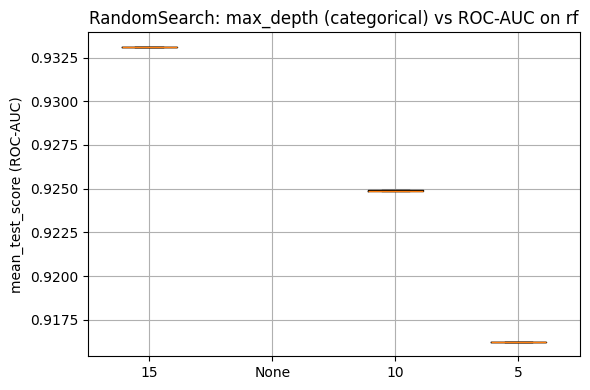

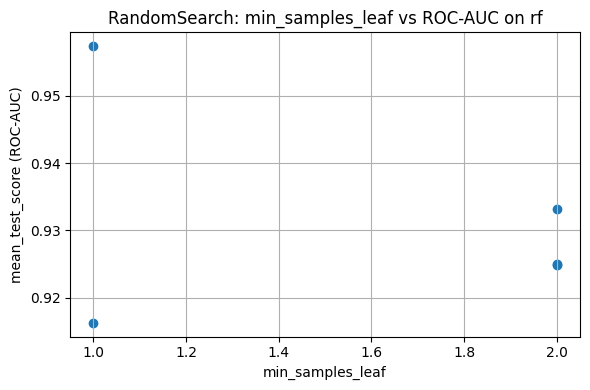

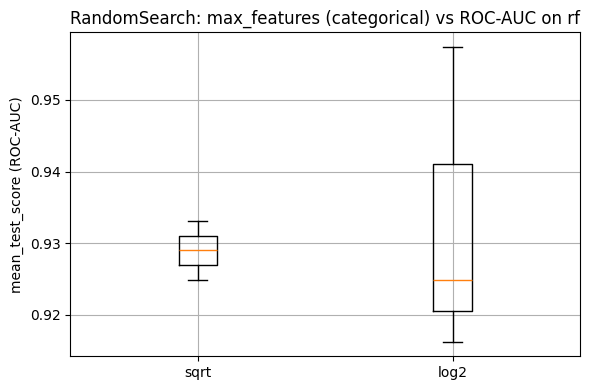

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV done
Лучшие параметры rf (RandomSearch): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Лучший ROC-AUC rf (RandomSearch): 0.9688481612500093
plot_random_search_results done
plot_random_search_results started..
['n_estimators', 'max_depth', 'min_samples_leaf', 'max_features']


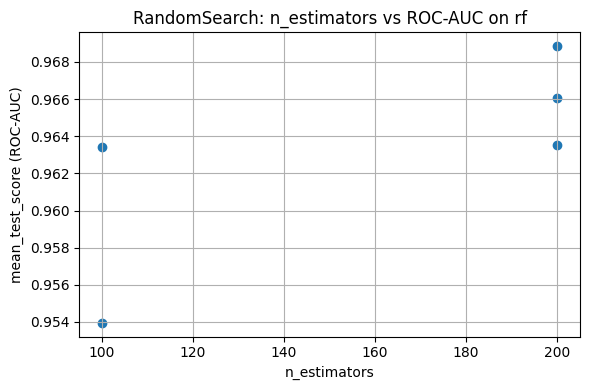

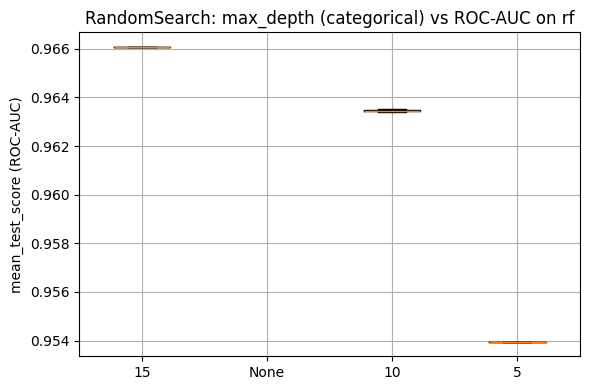

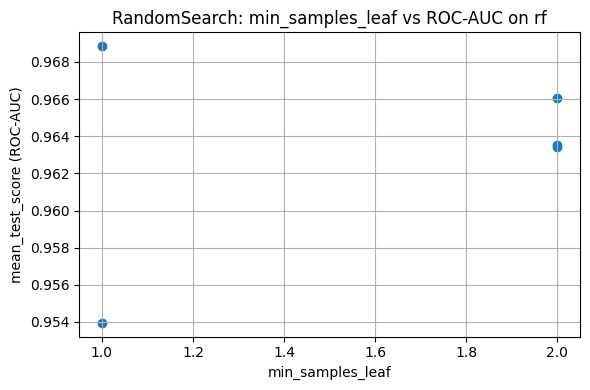

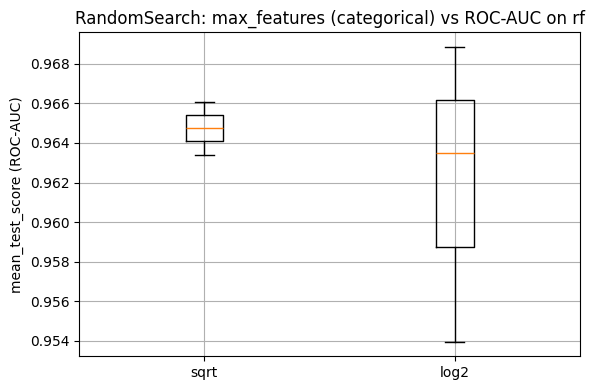

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV done
Лучшие параметры rf_balanced (RandomSearch): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Лучший ROC-AUC rf_balanced (RandomSearch): 0.9132094413364354
plot_random_search_results done
plot_random_search_results started..
['n_estimators', 'max_depth', 'min_samples_leaf', 'max_features']


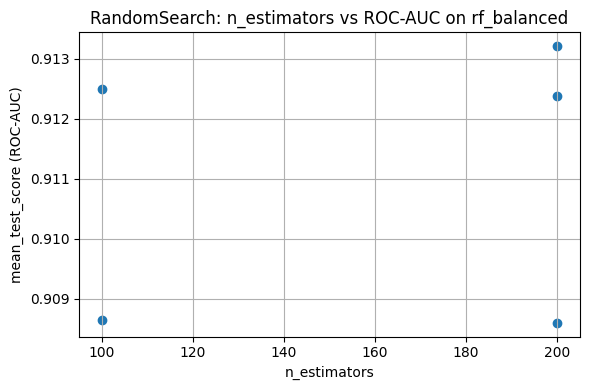

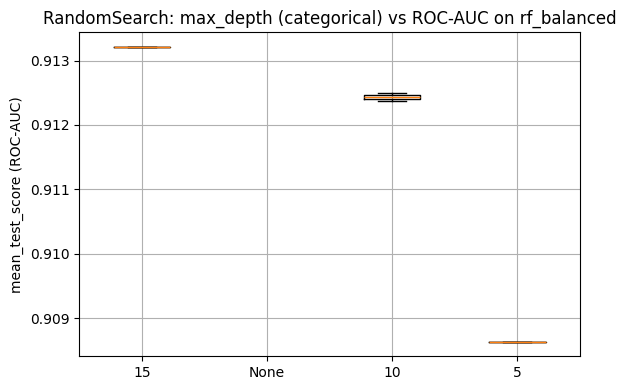

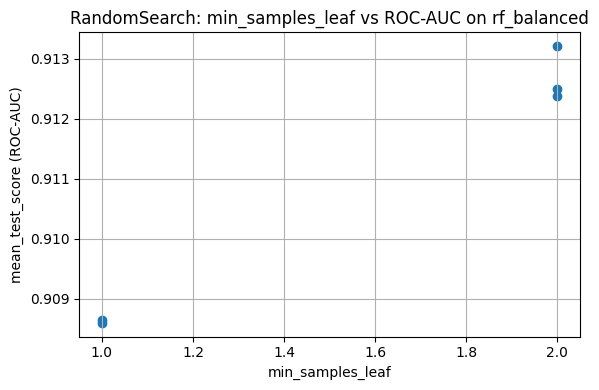

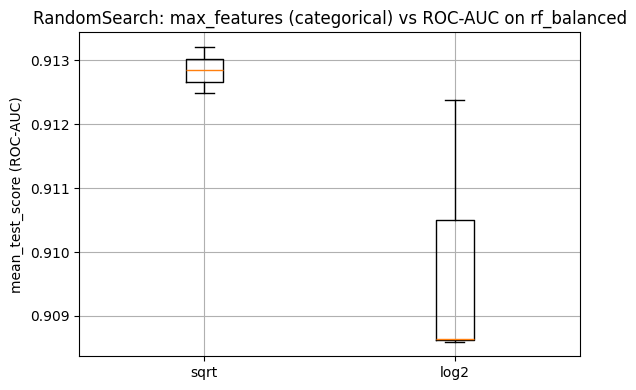

plot_random_search_results done
______________________________
get_file started..
get_file done
train_with_random_search started..
get_model_and_param_distributions started..
get_model_and_param_distributions done
KFold done
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV done
Лучшие параметры rf_balanced (RandomSearch): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Лучший ROC-AUC rf_balanced (RandomSearch): 0.9131723631146024
plot_random_search_results done
plot_random_search_results started..
['n_estimators', 'max_depth', 'min_samples_leaf', 'max_features']


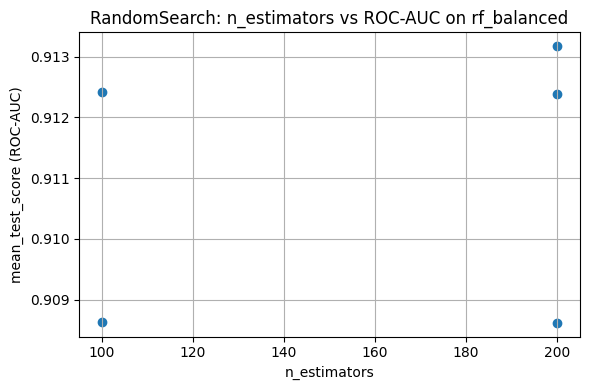

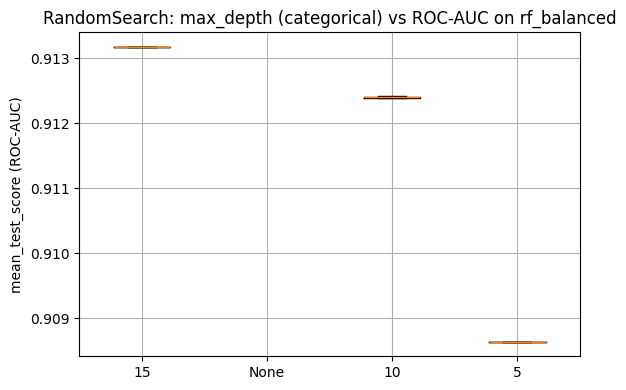

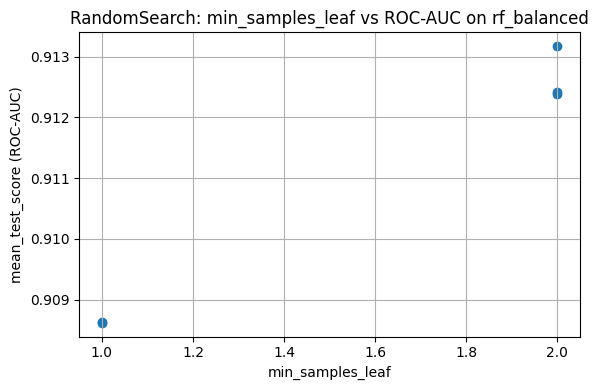

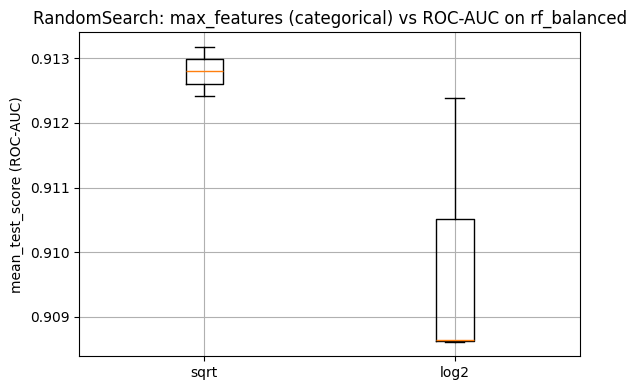

plot_random_search_results done
______________________________


In [26]:
files = ['CB_smote_log', 'CB_smote', 'CB_log', 'CB', 'RF_smote_log', 'RF_smote', 'RF_log', 'RF']
models = ['cb', 'cb', 'cb_balanced', 'cb_balanced', 'rf', 'rf', 'rf_balanced', 'rf_balanced']
path = '/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/'

# RandomSearch для получения грубой сетки гиперпараметров и визуализации
for f, m in zip(files, models):
  file_path = path + f + '.joblib'

  # Получение данных
  X_train, y_train, X_val, y_val = get_file(file_path)

  # Получение лучших моделей и параметров для визуализации
  rs, vis_params = train_with_random_search(
      X_train,
      y_train,
      model_type=m,
      n_iter=5,
      cv_splits=3,
      random_state=42,
      pos_weight=0.25,
      scoring="roc_auc"
  )

  # Визуализация
  plot_random_search_results(m, rs, vis_params)
  print('_' * 30)


In [ ]:
model_rf = RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
    )

model_cb = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=42,
        thread_count=-1,
    )

model_rf_balanced = RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    )

model_cb_balanced = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=42,
        thread_count=-1,
        scale_pos_weight=0.25
    )

param_list = [

    # 0 — CB_smote_log (cb)
    {
        "depth": [6],
        "learning_rate": [0.11],
        "l2_leaf_reg": [6, 7, 8],
        "iterations": [600, 800, 1000],
    },

    # 1 — CB_smote (cb)
    {
        "depth": [6],
        "learning_rate": [0.11],
        "l2_leaf_reg": [6, 7, 8],
        "iterations": [600, 800, 1000],
    },

    # 2 — CB_log (cb_balanced)
    {
        "depth": [6],
        "learning_rate": [0.11],
        "l2_leaf_reg": [6, 7, 8],
        "iterations": [600, 800, 1000],
    },

    # 3 — CB (cb_balanced)
    # best: depth=4, lr=0.1367, l2=1
    {
        "depth": [3, 4],
        "learning_rate": [0.14],
        "l2_leaf_reg": [1, 2],
        "iterations": [600, 800, 1000],
    },

    # 4 — RF_smote_log
    # best: n_estim=200, md=None, mss=2, msl=1, mf='log2'
    {
        "n_estimators": [200, 400, 600],
        "max_depth": [None],
        "min_samples_split": [2, 3, 4],
        "min_samples_leaf": [1],
        "max_features": ["log2"],
    },

    # 5 — RF_smote
    {
        "n_estimators": [200, 400, 600],
        "max_depth": [None],
        "min_samples_split": [2, 3, 4],
        "min_samples_leaf": [1],
        "max_features": ["log2"],
    },

    # 6 — RF_log (rf_balanced)
    # best: n_estim=200, md=15, mss=5, msl=2, mf='sqrt'
    {
        "n_estimators": [200, 400, 600],
        "max_depth": [None],
        "min_samples_split": [2, 3, 4],
        "min_samples_leaf": [2, 3],
        "max_features": ["sqrt"],
    },

    # 7 — RF (rf_balanced)
    # best: depth=15, mss=5, msl=2, features='sqrt'
    {
        "n_estimators": [200, 400, 600],
        "max_depth": [15],
        "min_samples_split": [4, 5, 6, 7],
        "min_samples_leaf": [2, 3],
        "max_features": ["sqrt"],
    },
]

roc_auc_dict = {}
files = ['CB_smote_log', 'CB_smote', 'CB_log', 'CB', 'RF_smote_log', 'RF_smote', 'RF_log', 'RF']
models = ['cb', 'cb', 'cb_balanced', 'cb_balanced', 'rf', 'rf', 'rf_balanced', 'rf_balanced']
path = '/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/'

# GridSearch около лучших гиперпараметров
for i, (f, m) in enumerate(zip(files, models)):
  file_path = path + f + '.joblib'

  # Получение данных
  X_train, y_train, X_val, y_val = get_file(file_path)

  if m == 'cb':
    base_model = model_cb
  elif m == 'cb_balanced':
    base_model = model_cb_balanced
  elif m == 'rf':
    base_model = model_rf
  elif m == 'rf_balanced':
    base_model = model_rf_balanced

  # Кастомный grid_search
  best_params, best_roc = grid_search_manual(
    model=base_model,
    param_grid=param_list[i],
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
  )
  print("\033[37m{}".format("\nФайл и модель"), f, m)
  print("\033[37m{}".format("\nЛучшие параметры:"), best_params)
  print("\033[37m{}".format("Лучший ROC-AUC:"), best_roc)

  # Сохранение модели
  print("\033[31m{}".format("model saving.."))
  joblib.dump(best_params, f + '_params.joblib')
  print("\033[31m{}".format("model saved"))

  # Сохранение roc_auc
  roc_auc_dict[m + '_' + f] = best_roc

get_file started..
get_file done
grid_search_manual started..
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9095980840409895
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9095980840409895
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9095980840409895
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9097280336932535
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9098104551674647
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9098848447596412
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9098848447596412
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9099447908966066
model cloned
model fitted..
model 

Не все модели прошли подбор гиперпараметров - отключилась среда выполнения, поэтому сохранение rf моделей будет вручную, а подбор гиперпараметров для rf_balanced модифицирован.


In [3]:
# Сохранение rf_smote и rf_smote_log из-за остановки среды выполнения (не сохранились файлы в colab)
params_rf_smote = {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 600}
files_rf_smote = ['RF_smote_log', 'RF_smote']
for f in files_rf_smote:
  joblib.dump(params_rf_smote, f + '_params.joblib')

In [6]:
# Определить гиперпараметры для оставшихся моделей
model_rf_balanced = RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    )

# n_estim = 600, т.к. все приходит к тому, что GridSearch берет наибольшее n
param_list = [

    # 6 — RF_log (rf_balanced)
    # best: n_estim=200, md=15, mss=5, msl=2, mf='sqrt'
    {
        "n_estimators": [600],
        "max_depth": [None],
        "min_samples_split": [2, 3, 4],
        "min_samples_leaf": [2, 3],
        "max_features": ["sqrt"],
    },

    # 7 — RF (rf_balanced)
    # best: depth=15, mss=5, msl=2, features='sqrt'
    {
        "n_estimators": [600],
        "max_depth": [15],
        "min_samples_split": [4, 5, 6, 7],
        "min_samples_leaf": [2, 3],
        "max_features": ["sqrt"],
    },
]

files = ['RF_log', 'RF']
models = ['rf_balanced', 'rf_balanced']
path = '/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/'

# GridSearch около лучших гиперпараметров
for i, (f, m) in enumerate(zip(files, models)):
  file_path = path + f + '.joblib'

  # Получение данных
  X_train, y_train, X_val, y_val = get_file(file_path)

  base_model = model_rf_balanced

  # Кастомный grid_search
  best_params, best_roc = grid_search_manual(
    model=base_model,
    param_grid=param_list[i],
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
  )
  print("\033[37m{}".format("\nФайл и модель"), f, m)
  print("\033[37m{}".format("\nЛучшие параметры:"), best_params)
  print("\033[37m{}".format("Лучший ROC-AUC:"), best_roc)

  # Сохранение модели
  print("\033[31m{}".format("model saving.."))
  joblib.dump(best_params, f + '_params.joblib')
  print("\033[31m{}".format("model saved"))

get_file started..
get_file done
grid_search_manual started..
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9117362932121493
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9117362932121493
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.9117362932121493
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.912245333852185
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.912245333852185
model cloned
model fitted..
model done
evaluate_model started..
evaluate_model done
iter done 0.912245333852185
grid_search_manual done

Файл и модель RF_log rf_balanced

Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 600}
Лучший ROC-AUC: 0.912245333852185
model saving..
model saved
get_file star

In [7]:
def final_preprocessing(
    df_test,
    df_train,
    target_col: str,
    log_cols=None,
    label_cols=None,
    onehot_cols=None,
    smote: bool = False,
    random_state: int = 42,
):
  print("\033[31m{}".format("final preprocessing started.."))

  # ----------------- 0. Split train data -----------------
  y_train = df_train[target_col].values
  X_train = df_train.drop(columns=[target_col])

  X_test = df_test.copy()

  print("\033[31m{}".format("train split done"))

  # ----------------- 1. Log-transform -----------------
  if log_cols:
    for col in log_cols:
      min_val = X_train[col].min()
      shift = 1 - min_val if min_val <= 0 else 1

      X_train[col] = np.log(X_train[col] + shift)
      X_test[col] = np.log(X_test[col] + shift)

    print("\033[31m{}".format("log-transform done"))

  # ----------------- 2. Label Encoding -----------------
  if label_cols:
    for col in label_cols:
      le = LabelEncoder()
      X_train[col] = le.fit_transform(X_train[col].astype(str))

      X_test[col] = X_test[col].astype(str).apply(
          lambda x: le.transform([x])[0] if x in le.classes_ else -1
      )

    print("\033[31m{}".format("label Encoding done"))

  # ----------------- 3. One-Hot Encoding -----------------
  if onehot_cols:
    onehot_encoder = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False
    )

    train_ohe = onehot_encoder.fit_transform(X_train[onehot_cols])
    test_ohe = onehot_encoder.transform(X_test[onehot_cols])

    ohe_feature_names = onehot_encoder.get_feature_names_out(onehot_cols)

    train_ohe_df = pd.DataFrame(
        train_ohe,
        columns=ohe_feature_names,
        index=X_train.index
    )

    test_ohe_df = pd.DataFrame(
        test_ohe,
        columns=ohe_feature_names,
        index=X_test.index
    )

    X_train = X_train.drop(columns=onehot_cols)
    X_test = X_test.drop(columns=onehot_cols)

    X_train = pd.concat([X_train, train_ohe_df], axis=1)
    X_test = pd.concat([X_test, test_ohe_df], axis=1)

    print("\033[31m{}".format("one-hot encoding done"))

  # ----------------- 4. SMOTE (train only) -----------------
  if smote:
    sm = SMOTE(random_state=random_state)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    print("\033[31m{}".format("smote done"))

  # ----------------- 5. StandardScaler -----------------
  num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
  scaler = StandardScaler()
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
  X_test[num_cols] = scaler.transform(X_test[num_cols])

  print("\033[31m{}".format("standard scaler done"))
  print("\033[31m{}".format("final preprocessing done"))
  return X_train, y_train, X_test

In [16]:
# ПО ОШИБКЕ НЕ ПЕРЕБИРАЛ АРГУМЕНТЫ ПРЕПРОЦЕССИНГА, ПОЭТОМУ РЕЗУЛЬТАТЫ CATBOOST ПЛОХИЕ (Хотя при таком исходе они все равно лучше RF)
# Финальное обучение на полном тренировочном датасете и получение вероятностей на тестовом датасете
y_sub = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/sample_submission.csv', index_col='id')

params_files = ['CB_smote_log_params', 'CB_smote_params', 'CB_log_params', 'CB_params', 'RF_smote_log_params', 'RF_smote_params', 'RF_log_params', 'RF_params']
smote_flag = [True, True, False, False, True, True, False, False]
target_col = 'loan_paid_back'

obj_cols = list(train_df.select_dtypes(['object']).columns)
ohe_cols = [col for col in obj_cols if train_df[col].nunique() <= 4]
le_cols  = [col for col in obj_cols if train_df[col].nunique() > 4]

num_cols = list(train_df.select_dtypes(['float64','int64']).columns)
num_cols.pop(-1)

model_rf = RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
    )

model_cb = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=42,
        thread_count=-1,
    )

model_rf_balanced = RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    )

model_cb_balanced = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=42,
        thread_count=-1,
        scale_pos_weight=0.25

    )

path = '/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/'

for fl, p in zip(smote_flag, params_files):
  file_path = path + p + '.joblib'

  print("\033[31m{}".format("get_file started.."))
  try:
    params = joblib.load(file_path)
  except:
    raise ValueError("Неверный file_path")
  print("\033[31m{}".format("get_file done"))

  if 'CB' in p:
    if fl:
      final_model = clone(model_cb)
    else:
      final_model = clone(model_cb_balanced)
  if 'RF' in p:
    if fl:
      final_model = clone(model_rf)
    else:
      final_model = clone(model_rf_balanced)

  final_model.set_params(**params)
  print("\033[31m{}".format("params set done"))
  print("\033[37m{}".format("model params"), final_model.get_params())
  X_train, y_train, X_test = final_preprocessing(
    df_test=test_df,
    df_train=train_df,
    target_col=target_col,
    log_cols=num_cols,
    label_cols=le_cols,
    onehot_cols=ohe_cols,
    smote=fl,
    random_state=42,
  )

  print("\033[31m{}".format("fit started.."))
  final_model.fit(X_train, y_train)
  print("\033[31m{}".format("fit done"))


  y_pred_proba = final_model.predict_proba(X_test)[:, 1]
  print("\033[31m{}".format("predict_proba done"))

  y_sub['loan_paid_back'] = y_pred_proba
  y_sub.to_csv(p +'_y_sub.csv')
  print("\033[37m{}".format("y_test on"), p, end=' ')
  print('saved\n')


get_file started..
get_file done
params set done
model params {'loss_function': 'Logloss', 'verbose': False, 'eval_metric': 'AUC', 'random_state': 42, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 8, 'learning_rate': 0.11}
final preprocessing started..
train split done
log-transform done
label Encoding done
one-hot encoding done
smote done
standard scaler done
final preprocessing done
fit started..
fit done
predict_proba done
y_test on CB_smote_log_params saved

get_file started..
get_file done
params set done
model params {'loss_function': 'Logloss', 'verbose': False, 'eval_metric': 'AUC', 'random_state': 42, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7, 'learning_rate': 0.11}
final preprocessing started..
train split done
log-transform done
label Encoding done
one-hot encoding done
smote done
standard scaler done
final preprocessing done
fit started..
fit done
predict_proba done
y_test on CB_smote_params saved

get_file started..
get_file done
params set done
model params {'loss

In [18]:
# Лучше всех себя показал CatBoost без log, smote и smote+log, поэтому последний эксперимент:
# применение CatBoost без обработки категориальных данных и с большим количеством iter (=1000/=1500) и с автоматическим lr.
y_sub = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/sample_submission.csv', index_col='id')

target_col = 'loan_paid_back'
obj_cols = list(train_df.select_dtypes(['object']).columns)

iterations = [1000, 1500]

for iter in iterations:
  model_cb_final = CatBoostClassifier(
          loss_function="Logloss",
          eval_metric="AUC",
          verbose=False,
          random_state=42,
          thread_count=-1,
          scale_pos_weight=0.25,
          depth=4,
          iterations=iter
          l2_leaf_reg=2
      )

  X_train, y_train, X_test = final_preprocessing(
      df_test=test_df,
      df_train=train_df,
      target_col=target_col,
      random_state=42,
    )

  model_cb_final.fit(X_train, y_train, cat_features=obj_cols)

  y_pred_proba = model_cb_final.predict_proba(X_test)[:, 1]

  y_sub['loan_paid_back'] = y_pred_proba
  y_sub.to_csv('final_cb_' + str(iter) +'_y_sub.csv')

final preprocessing started..
train split done
standard scaler done
final preprocessing done
final preprocessing started..
train split done
standard scaler done
final preprocessing done


In [19]:
# Результаты предыдущего прохода оказались хуже, поэтому с параметрами GridSearch перебор количества итераций
y_sub = pd.read_csv('/content/drive/My Drive/colab_notebooks/Kaggle-Predicting-Loan-Payback/sample_submission.csv', index_col='id')

target_col = 'loan_paid_back'
obj_cols = list(train_df.select_dtypes(['object']).columns)

num_cols = list(train_df.select_dtypes(['float64','int64']).columns)
num_cols.pop(-1)

X_train, y_train, X_test = final_preprocessing(
      df_test=test_df,
      df_train=train_df,
      target_col=target_col,
      label_cols=obj_cols,
      random_state=42,
    )

iterations = [1000, 1200, 1400, 1600, 1800, 2000, 2200]

for iter in iterations:
  model_cb_final = CatBoostClassifier(
          loss_function="Logloss",
          eval_metric="AUC",
          verbose=False,
          random_state=42,
          thread_count=-1,
          scale_pos_weight=0.25,
          depth=4,
          iterations=iter,
          l2_leaf_reg=2,
          learning_rate=0.14
      )


  print("\033[31m{}".format("fitted.."))
  model_cb_final.fit(X_train, y_train)
  print("\033[37m{}".format("fit done"))

  y_pred_proba = model_cb_final.predict_proba(X_test)[:, 1]

  y_sub['loan_paid_back'] = y_pred_proba
  y_sub.to_csv('cb_' + str(iter) +'_y_sub.csv')

final preprocessing started..
train split done
label Encoding done
standard scaler done
final preprocessing done
fitted..
fit done
fitted..
fit done
fitted..
fit done
fitted..
fit done
fitted..
fit done
fitted..
fit done
fitted..
fit done
